In [35]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from importlib.machinery import SourceFileLoader
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'gray'
M = SourceFileLoader("models", "../main/models.py").load_module()

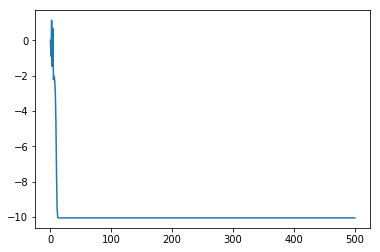

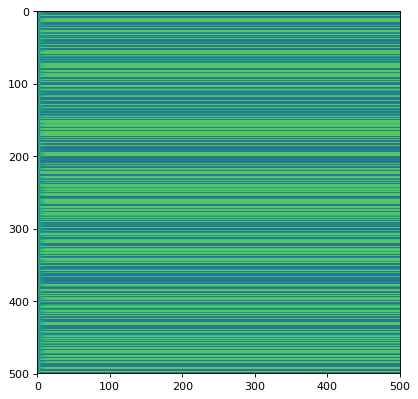

In [31]:
num_neurons = 500
connectivity = .01
spectral_radius = 0.8

r = M.Reservoir(num_neurons,connectivity,spectral_radius,init_pattern = 'random',feedback=True,bias=False,fb_scale=.5)

r.run(steps=500)

In [53]:
f = torch.sin
steps = 2000
dt = 0.05
ls = []
xs = []
for s in range(steps):
    xs.append(torch.tensor([dt*s]))
    ls.append(f(torch.tensor([dt*s])))


In [56]:
lr = 0.1
n = 500
conn = .01
rho = 0.8
r = M.Reservoir(n,conn,rho,init_pattern='random',feedback=True,bias=False,fb_scale=.5)
es = []
for s in range(len(ls)):
    y = r.forward()
    e = (y - ls[s]).pow(2)
    es.append(e)
err = torch.sum(torch.cat(es)) / len(ls)
print(err)
err.backward()
grad = r.readout_w.grad
with torch.no_grad():
    r.readout_w -= grad * lr
    r.readout_w = grad.zero_()

tensor(101.0040, grad_fn=<DivBackward0>)


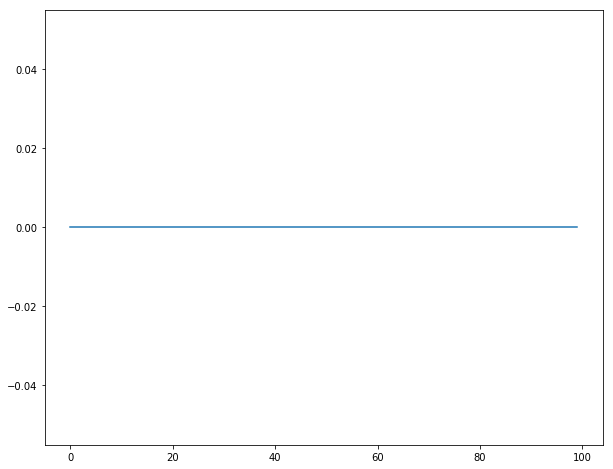

In [57]:

outs = []
for s in range(100):
    outs.append(r.forward())
plt.plot(outs)
plt.show()